In [17]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt

In [10]:
train_data = torchvision.datasets.MNIST('data/', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_data = torchvision.datasets.MNIST('data/', train=False, transform=torchvision.transforms.ToTensor(), download=True)

In [15]:
X_train = train_data.data.float()

In [16]:
X_test = test_data.data.float()

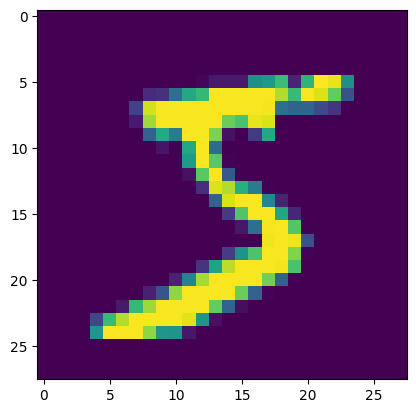

In [18]:
plt.imshow(X_train[0].view(28,28))

In [22]:
perm = torch.randperm(784)
P = torch.eye(784)[perm]

In [23]:
P

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

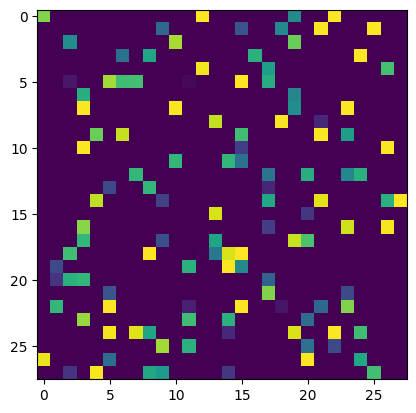

In [30]:
plt.imshow(torch.matmul(X_train[2].flatten(), P).view(28,28))

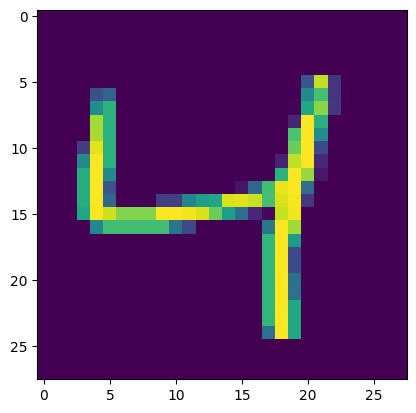

In [31]:
plt.imshow(torch.matmul(torch.matmul(X_train[2].flatten(), P), torch.linalg.inv(P)).view(28,28))

In [35]:
X = torch.concat((X_train, X_test), 0).flatten(1)

In [36]:
X.shape

torch.Size([70000, 784])

In [37]:
Y = torch.mm(X, P)

In [39]:
np.save('data/MNIST/original_concat.npy', X)

In [40]:
np.save('data/MNIST/permuted_concat.npy', Y)

In [41]:
np.save('data/MNIST/permutation_mat.npy', P)